In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

plt.style.use("bmh")

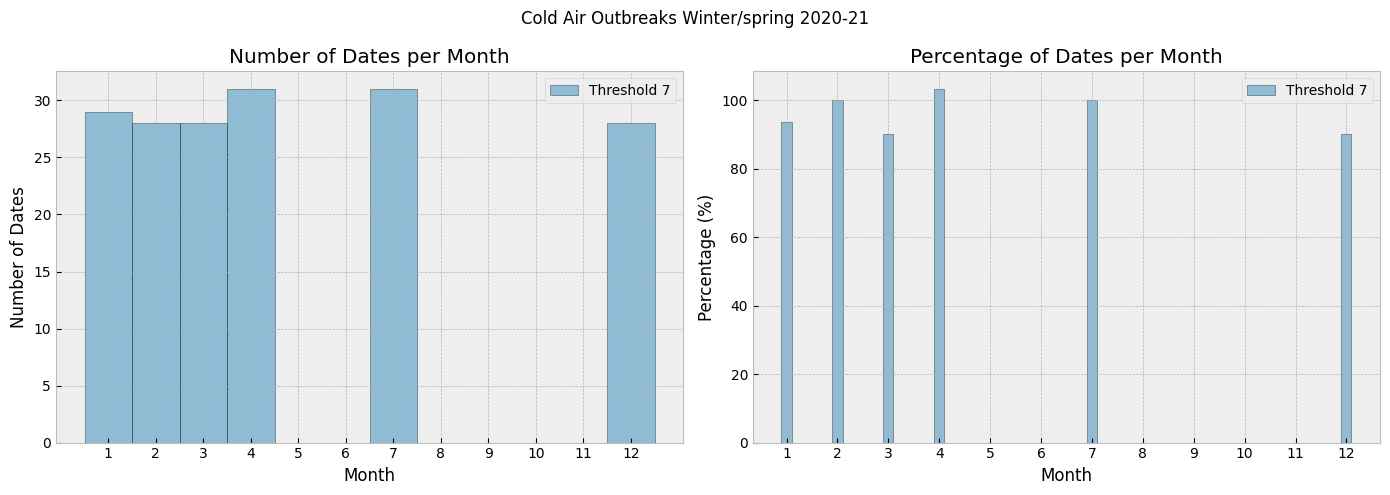

In [9]:
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dates_5 = np.load("/uio/hume/student-u37/fslippe/data/date_hist_2020_21_5.npy")
dates_7 = np.concatenate((np.load("/uio/hume/student-u37/fslippe/data/date_hist_429679-20210201_7.npy"), 
                        np.load("/uio/hume/student-u37/fslippe/data/date_hist_409180-20210401_7.npy"), 
                        np.load("/uio/hume/student-u37/fslippe/data/date_hist_20210401-20210801_7.npy")))
dates_10 = np.load("/uio/hume/student-u37/fslippe/data/date_hist_2020_21_10.npy")
dates_plus10_7 = np.load("/uio/hume/student-u37/fslippe/data/date_hist_202104+10_7.npy")
# ... [your other data loading here]

def extract_months(dates):
    years = [int(date[:4]) for date in dates]
    days = [int(date[4:]) for date in dates]
    months = [np.datetime64(f'{year}-01-01') + np.timedelta64(day-1,'D') for year, day in zip(years, days)]
    return [month.astype(object).month for month in months]

# Extract months from dates
months_5 = extract_months(dates_5)
months_7 = extract_months(dates_7)
months_10 = extract_months(dates_10)
months_plus10_7 = extract_months(dates_plus10_7)
# Define a function to calculate the month percentages
def calculate_percentage(month_counts, days_in_month):
    return [100 * month_counts[i] / days_in_month[i] for i in range(12)]


# Set up side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# Plot actual counts on the first subplot for each dataset
bins = np.arange(1,14) - 0.5
#n_5, _, _ = ax1.hist(months_5, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="Threshold 5")
n_7, _, _ = ax1.hist(months_7, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="Threshold 7")
#n_10, _, _ = ax1.hist(months_10, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="Threshold 10")
#n_plus10_7, _, _ = ax1.hist(months_plus10_7, bins=bins, edgecolor="k", alpha=0.5, align="mid", label="10W added Threshold 7")


# Set properties for ax1
ax1.set_xticks(np.arange(1,13))
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Dates")
ax1.set_title("Number of Dates per Month")
ax1.legend()

# Plot percentages on the second subplot for each dataset
#ax2.bar(np.arange(1,13) - 0.2, calculate_percentage(n_5, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Threshold 5")
ax2.bar(np.arange(1,13), calculate_percentage(n_7, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Threshold 7")
#ax2.bar(np.arange(1,13) + 0.2, calculate_percentage(n_10, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Threshold 10")
#ax2.bar(np.arange(1,13) + 0.4, calculate_percentage(n_plus10_7, days_in_month), width=0.2, edgecolor="k", alpha=0.5, label="Threshold 10")

# Set properties for ax2
ax2.set_xticks(np.arange(1,13))
ax2.set_xlabel("Month")
ax2.set_ylabel("Percentage (%)")
ax2.set_title("Percentage of Dates per Month")
ax2.legend()

fig.suptitle("Cold Air Outbreaks Winter/spring 2020-21")
plt.tight_layout()
plt.show()

In [9]:
from datetime import datetime
converted_dates = [datetime.strptime(date, '%Y%j').strftime('%Y%m%d') for date in dates]

np.array(converted_dates)

array(['20201201', '20201202', '20201203', '20201205', '20201213',
       '20201216', '20201219', '20201221', '20201223', '20201224',
       '20201225', '20201226', '20201227', '20201228', '20201229',
       '20201230', '20210107', '20210110', '20210111', '20210112',
       '20210114', '20210116', '20210117', '20210118', '20210119',
       '20210120', '20210121', '20210122', '20210123', '20210124',
       '20210125', '20210126', '20210127', '20210128', '20210129',
       '20210130', '20210131', '20210201', '20210202', '20210203',
       '20210204', '20210205', '20210206', '20210207', '20210208',
       '20210209', '20210210', '20210211', '20210212', '20210213',
       '20210215', '20210216', '20210217', '20210218', '20210221',
       '20210225', '20210226', '20210302', '20210303', '20210304',
       '20210305', '20210306', '20210307', '20210308', '20210309',
       '20210310', '20210311', '20210312', '20210314', '20210315',
       '20210316', '20210317', '20210318', '20210321', '202103

Total number of events: 24


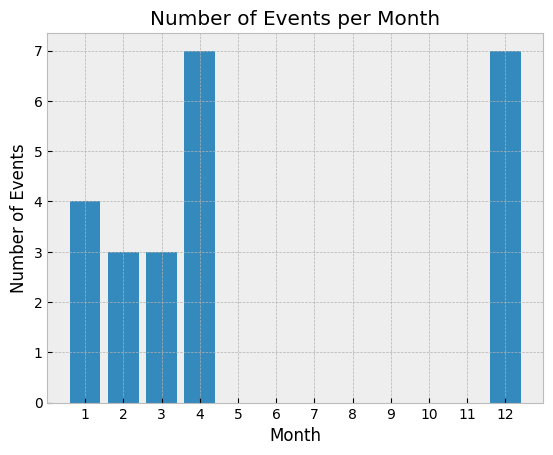

In [10]:

# Convert the dates to datetime objects
dates = [datetime.strptime(date, '%Y%j') for date in dates]

# Sort the dates
dates.sort()

# Count events
events = 1  # Start with 1 because the first date itself is an event start
for i in range(1, len(dates)):
    if dates[i] - dates[i-1] > timedelta(days=1):
        events += 1

print(f"Total number of events: {events}")
import matplotlib.pyplot as plt
import numpy as np

# Extract months from dates
months = [date.month for date in dates]

# Determine events for each month
event_counts = {}
for i in range(len(months)):
    if i == 0 or dates[i] - dates[i-1] > timedelta(days=1):
        event_counts[months[i]] = event_counts.get(months[i], 0) + 1

# Plotting
months_unique = list(event_counts.keys())
counts = [event_counts[month] for month in months_unique]
plt.bar(months_unique, counts)
plt.xticks(np.arange(1, 13))
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.title("Number of Events per Month")
plt.show()
